In [1]:
from fastai2.vision.all import *

In [3]:
print(torch.version.cuda)
print(torch.backends.cudnn.enabled)

10.1
True


In [4]:
!nvidia-smi

Fri Jul 31 00:01:35 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 450.36.06    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro P4000        On   | 00000000:00:05.0 Off |                  N/A |
| 46%   27C    P8     5W / 105W |      4MiB /  8119MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [47]:
from zipfile import *
with ZipFile('Fruits.zip', 'r') as zipObj:
   # Extract all the contents of zip file in different directory
   zipObj.extractall('Fruits_train')

In [48]:
path = 'Fruits_train/Fruits'
!ls {path}

Apple Braeburn	Cherry Rainier	Strawberry	   Watermelon
Apricot		Rambutan	Tomato Cherry Red


In [49]:
fruits = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [50]:
dls =fruits.dataloaders(path)

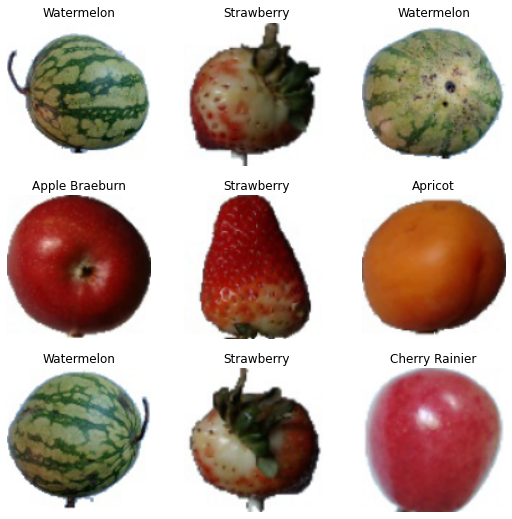

In [52]:
dls.show_batch(max_n=9)

In [53]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.488921,0.000099,0.000000,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.000837,0.000005,0.000000,00:04


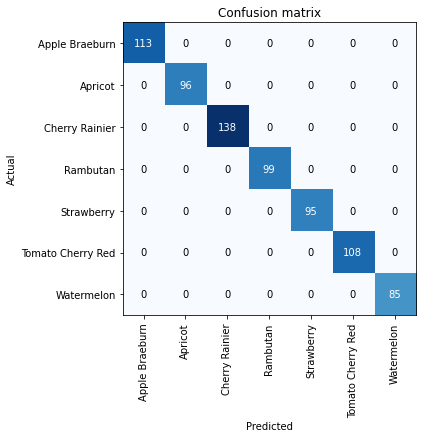

In [54]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,6))

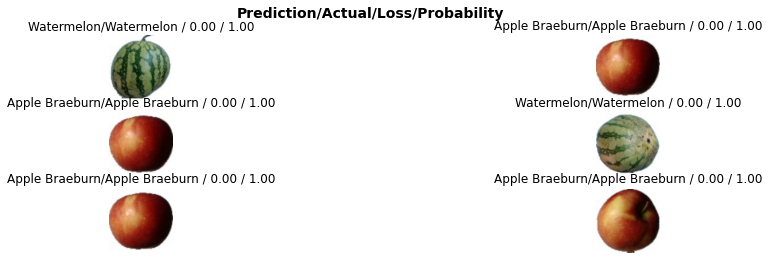

In [65]:
interp.plot_top_losses(6, nrows=3,figsize=(16,4))

In [66]:
learn.export()

In [67]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [46]:
#import shutil

#shutil.rmtree('Fruits_train')

In [59]:

!jupyter nbextension enable --py widgetsnbextension


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [78]:
from ipywidgets import interact, interactive, fixed, interact_manual,VBox
import ipywidgets as widgets

In [61]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [62]:
img = PILImage.create(btn_upload.data[-1])

In [63]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [70]:
learn_inf = load_learner(path/'export.pkl')

pred,pred_idx,probs = learn_inf.predict(img)


lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Apple Braeburn; Probability: 1.0000')

In [71]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [72]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [79]:
VBox([widgets.Label('Select your Fruit!'),
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
!pip install voila
!jupyter serverextension enable voila --sys-prefix